In [ ]:
# G. Hayes 2025
# This script runs the group analysis of the parameters computed in the analysis presented in:
# G. Hayes, S. Sparks, J. Pinto, and D. P. Bulte, "Models of Cerebrovascular Reactivity in BOLD-fMRI and Transcranial Doppler Ultrasound"

# To run the preprocessing of the TCD data, use the "1_tcd_ramp_preprocessing.ipynb" script.
# To run the preprocessing of the MRI data, use the "2_mri_co2_preprocessing.ipynb" script.
# To run the fitting of the data after the preprocessing, use the "3_mni_mri_tcd_analysis.ipynb" script.

# Updated this script for your purposes, notably:
# - the data file name
# - the output file name
# - alter parameters that may differ for your data

# Note that plotting includes annotations with the subject numbers or age, and coloured markers to identify sex of participants. 
# This was used for visual inspection of the data, and may not be necessary for your purposes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30

In [ ]:
# read the tcd csv log file
local = 'path/to/your/data/folder'
out_dir = local+'/grids/'

#if output directory doesn't exist, make it
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

csv_para_log_name_tcd_bayes = local + 'parameter_log_tcd_bayes.csv'
csv_para_log_name_tcd_LSR = local + 'parameter_log_tcd_LSR.csv'
csv_para_log_name_mri_bayes = local + 'parameter_log_mri_bayes.csv'
csv_para_log_name_mri_LSR = local + 'parameter_log_mri_LSR.csv'

In [51]:
# read csv log files and plot histograms of each parameter
df_tcd_bayes = pd.read_csv(csv_para_log_name_tcd_bayes)
df_tcd_LSR = pd.read_csv(csv_para_log_name_tcd_LSR)

# MRI
df_mri_bayes = pd.read_csv(csv_para_log_name_mri_bayes)
df_mri_LSR = pd.read_csv(csv_para_log_name_mri_LSR)

sub_df_tcd_bayes = df_tcd_bayes[['mr-sub']]
# convert sub_df_NS to a list
sub_list = sub_df_tcd_bayes['mr-sub'].tolist()
# remove the sub- prefix in each element of the list
sub_list = [sub[3:] for sub in sub_list]
print(sub_list)
print(df_tcd_bayes)

['003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '019', '020', '021', '022', '023', '024', '027', '029', '028', '026']
        sub  mr-sub  a_opt_4p_bayes  b_opt_4p_bayes  c_opt_4p_bayes  \
0   SUB-021  MR-003        0.234036       10.692910       43.633827   
1   SUB-022  MR-004        0.439466        8.212549       43.773515   
2   SUB-023  MR-005        0.493731       13.877031       46.403902   
3   SUB-025  MR-006        0.426446       10.566179       42.784764   
4   SUB-024  MR-007        0.235614       13.573214       40.938989   
5   SUB-026  MR-008        0.412493        8.252308       47.895301   
6   SUB-029  MR-009        0.043107       14.859991       48.360426   
7   SUB-035  MR-010        0.502934       11.457739       48.671120   
8   SUB-032  MR-011        0.737874        6.594354       47.499344   
9   SUB-031  MR-012        0.093023       14.868953       36.604612   
10  SUB-044  MR-013        0.211953       1

In [ ]:
# choose which subjects to include in plotting and analysis
subs_to_include = ['003', '004', '005', '006', '007', '008', '009', '010', '011', '013', '014', '015', '016', '017', '019', '020', '021', '022', '023', '024', '026', '027', '028','029']

# crop the dataframes to only include the subjects of interest
df_tcd_bayes = df_tcd_bayes[df_tcd_bayes['mr-sub'].str.contains('|'.join(subs_to_include))]
df_tcd_LSR = df_tcd_LSR[df_tcd_LSR['mr-sub'].str.contains('|'.join(subs_to_include))]

df_mri_bayes = df_mri_bayes[df_mri_bayes['mr-sub'].str.contains('|'.join(subs_to_include))]
df_mri_LSR = df_mri_LSR[df_mri_LSR['mr-sub'].str.contains('|'.join(subs_to_include))]

# crop the dataframes to only include the subjects of interest
df_tcd_bayes = df_tcd_bayes[df_tcd_bayes['mr-sub'].str.contains('|'.join(subs_to_include))]
df_tcd_LSR = df_tcd_LSR[df_tcd_LSR['mr-sub'].str.contains('|'.join(subs_to_include))]

df_mri_bayes = df_mri_bayes[df_mri_bayes['mr-sub'].str.contains('|'.join(subs_to_include))]
df_mri_LSR = df_mri_LSR[df_mri_LSR['mr-sub'].str.contains('|'.join(subs_to_include))]

# reset the index of the dataframes
df_tcd_bayes = df_tcd_bayes.reset_index(drop=True)
df_tcd_LSR = df_tcd_LSR.reset_index(drop=True)

df_mri_bayes = df_mri_bayes.reset_index(drop=True)
df_mri_LSR = df_mri_LSR.reset_index(drop=True)

print('NUMBER OF SUBJECTS INCLUDED IN ANALYSIS: ', len(df_tcd_bayes))

NUMBER OF SUBJECTS INCLUDED IN ANALYSIS:  24


In [ ]:
#TCD
# 4p parameters
# isolate the a_opt_4p_bayes column in df_NS
a_opt_4p_tcd_bayes = df_tcd_bayes['a_opt_4p_bayes']
a_opt_4p_tcd_LSR = df_tcd_LSR['a_opt_4p']
# b_opt_4p
b_opt_4p_tcd_bayes = df_tcd_bayes['b_opt_4p_bayes']
b_opt_4p_tcd_LSR = df_tcd_LSR['b_opt_4p']
# c_opt_4p
c_opt_4p_tcd_bayes = df_tcd_bayes['c_opt_4p_bayes']
c_opt_4p_tcd_LSR = df_tcd_LSR['c_opt_4p']
# d_opt_4p
d_opt_4p_tcd_bayes = df_tcd_bayes['d_opt_4p_bayes']
d_opt_4p_tcd_LSR = df_tcd_LSR['d_opt_4p']
#shift parameters
shift_par_4p_tcd_bayes = df_tcd_bayes['shift_par_4p_bayes']
shift_par_4p_tcd_LSR = df_tcd_LSR['shift_par_4p_LSR']
#slope_lin
slope_lin_tcd = df_tcd_LSR['slope_lin']

# 5p parameters
# isolate the a_opt_5p_bayes column in df_NS
a_opt_5p_tcd_bayes = df_tcd_bayes['a_opt_5p_bayes']
a_opt_5p_tcd_LSR = df_tcd_LSR['a_opt_5p']
# b_opt_5p
b_opt_5p_tcd_bayes = df_tcd_bayes['b_opt_5p_bayes']
b_opt_5p_tcd_LSR = df_tcd_LSR['b_opt_5p']
# c_opt_5p
c_opt_5p_tcd_bayes = df_tcd_bayes['c_opt_5p_bayes']
c_opt_5p_tcd_LSR = df_tcd_LSR['c_opt_5p']
# d_opt_5p
d_opt_5p_tcd_bayes = df_tcd_bayes['d_opt_5p_bayes']
d_opt_5p_tcd_LSR = df_tcd_LSR['d_opt_5p']
# s_opt_5p
s_opt_5p_tcd_bayes = df_tcd_bayes['s_opt_5p_bayes']
s_opt_5p_tcd_LSR = df_tcd_LSR['s_opt_5p']
#shift parameters
shift_par_5p_tcd_bayes = df_tcd_bayes['shift_par_5p_bayes']
shift_par_5p_tcd_LSR = df_tcd_LSR['shift_par_5p_LSR']


# 4p parameters
# isolate the a_opt_4p_bayes column in df_NS
a_opt_4p_mri_bayes = df_mri_bayes['a_opt_4p_bayes']
a_opt_4p_mri_LSR = df_mri_LSR['a_opt_4p']
# b_opt_4p
b_opt_4p_mri_bayes = df_mri_bayes['b_opt_4p_bayes']
b_opt_4p_mri_LSR = df_mri_LSR['b_opt_4p']
# c_opt_4p
c_opt_4p_mri_bayes = df_mri_bayes['c_opt_4p_bayes']
c_opt_4p_mri_LSR = df_mri_LSR['c_opt_4p']
# d_opt_4p
d_opt_4p_mri_bayes = df_mri_bayes['d_opt_4p_bayes']
d_opt_4p_mri_LSR = df_mri_LSR['d_opt_4p']
#shift parameters
shift_par_4p_mri_bayes = df_mri_bayes['mrshift_par_4p_bayes']
shift_par_4p_mri_LSR = df_mri_LSR['mrshift_par_4p_LSR']
#slope_lin
slope_lin_mri = df_mri_LSR['slope_lin']

# 5p parameters
# isolate the a_opt_5p_bayes column in df_NS
a_opt_5p_mri_bayes = df_mri_bayes['a_opt_5p_bayes']
a_opt_5p_mri_LSR = df_mri_LSR['a_opt_5p']
# b_opt_5p
b_opt_5p_mri_bayes = df_mri_bayes['b_opt_5p_bayes']
b_opt_5p_mri_LSR = df_mri_LSR['b_opt_5p']
# c_opt_5p
c_opt_5p_mri_bayes = df_mri_bayes['c_opt_5p_bayes']
c_opt_5p_mri_LSR = df_mri_LSR['c_opt_5p']
# d_opt_5p
d_opt_5p_mri_bayes = df_mri_bayes['d_opt_5p_bayes']
d_opt_5p_mri_LSR = df_mri_LSR['d_opt_5p']
# s_opt_5p
s_opt_5p_mri_bayes = df_mri_bayes['s_opt_5p_bayes']
s_opt_5p_mri_LSR = df_mri_LSR['s_opt_5p']
#shift parameters
shift_par_5p_mri_bayes = df_mri_bayes['mrshift_par_5p_bayes']
shift_par_5p_mri_LSR = df_mri_LSR['mrshift_par_5p_LSR']

In [ ]:
demo_dir = '/Users/ghayes/Desktop/ramp_protocol/data/Lifestyle'
demo_file = demo_dir + '/demo.csv'

df_demo = pd.read_csv(demo_file)

# crop the dataframes to only include the subjects of interest
df_demo = df_demo[df_demo['mr-sub'].str.contains('|'.join(subs_to_include))]
df_demo = df_demo.reset_index(drop=True)

# rearrange the df_demo dataframe to match the order of the subjects in sub_list
df2_demo = df_demo.set_index('mr-sub').reindex(df_tcd_bayes['mr-sub']).reset_index()

# get the age
age = df_demo['age']
# get the sexes
sex = df_demo['sex']

# print('AGE: ', age)
# print('SEX: ', sex)

AGE:  0     26
1     27
2     32
3     28
4     32
5     18
6     41
7     40
8     27
9     50
10    29
11    31
12    43
13    70
14    41
15    29
16    31
17    28
18    25
19    32
20    25
21    25
22    25
23    28
Name: age, dtype: int64
SEX:  0     M
1     F
2     M
3     F
4     F
5     M
6     M
7     M
8     F
9     M
10    F
11    F
12    F
13    F
14    F
15    M
16    F
17    M
18    F
19    M
20    M
21    M
22    F
23    M
Name: sex, dtype: object


p-value of linear slope, m:  0.004560648459737878
r-value of linear slope, m:  0.5585024410211892
0
26
10.692909602742942
15.284025702002433
1
27
8.212549387786481
20.46270987987269
2
32
13.877030797349104
19.561145465269405
3
28
10.566179103959422
16.931112663931412
4
32
13.57321434282354
16.34542371616176
5
18
8.252308472904177
18.242884685937018
6
41
14.859991331508768
14.347795279794427
7
40
11.457738712337449
13.71570326808525
8
27
6.594353594728712
15.97889497589905
9
50
10.148101551227738
19.78472106532854
10
29
8.52316653482509
16.034201686696328
11
31
7.621108228422711
18.681016657587524
12
43
14.26883943111573
18.949070279751098
13
70
14.519030150532814
21.5996241676248
14
41
6.9493011304978625
15.503895418960823
15
29
10.98098456535953
17.603507736101434
16
31
8.765701333771787
16.76673339638763
17
28
14.202499041569528
21.21503372513744
18
25
11.838740792191771
20.62400208455971
19
32
8.799241564916791
22.53780704117255
20
25
9.867306164697515
16.798590220375438
21
25
14.11

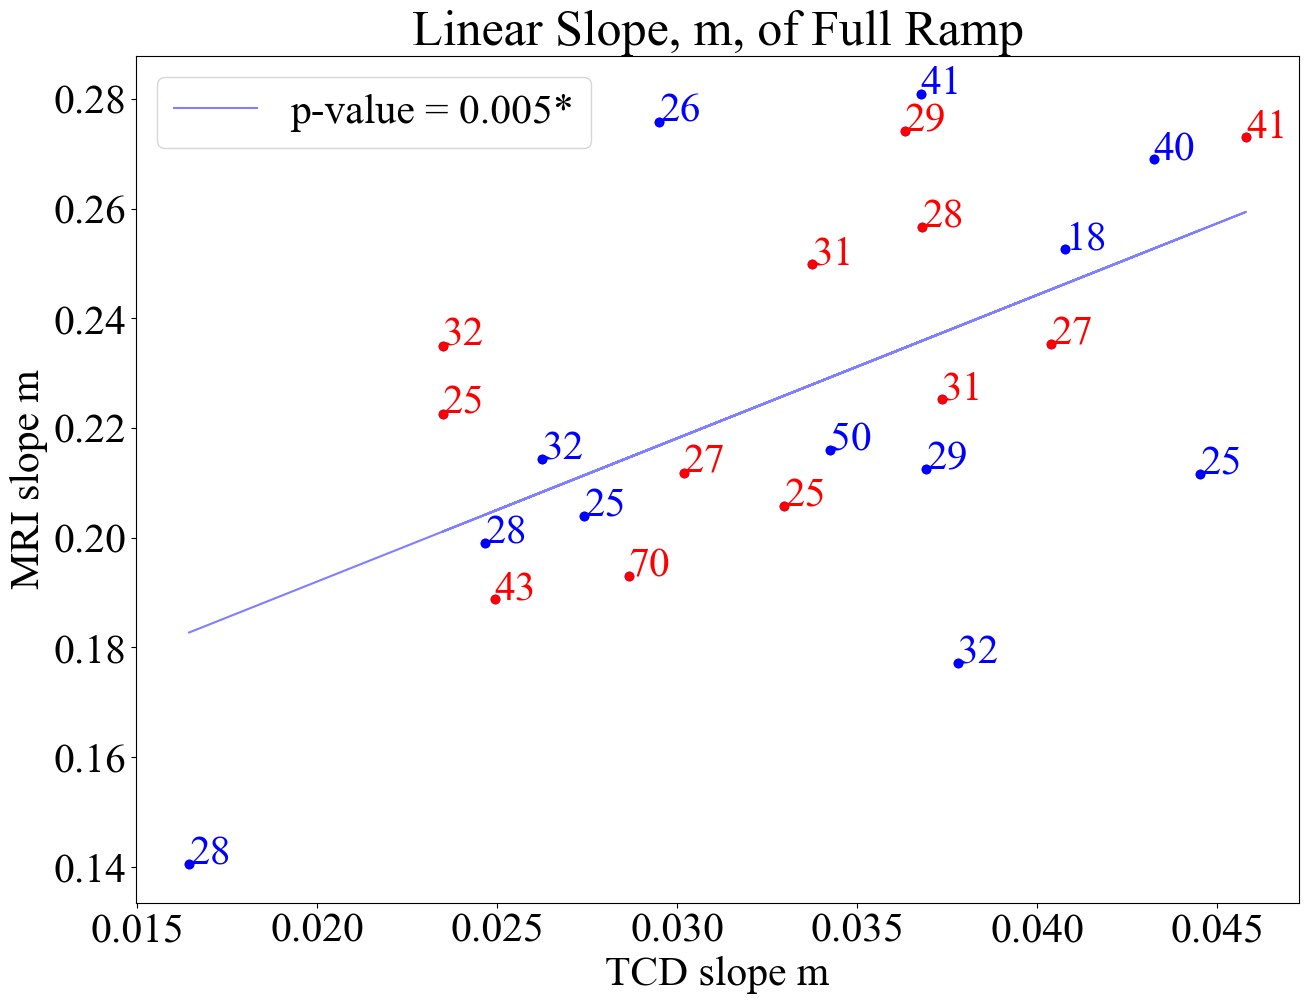

In [56]:
# scatter plot the slope_lin parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(slope_lin_tcd, slope_lin_mri, color='blue')
plt.xlabel('TCD slope m')
plt.ylabel('MRI slope m')
plt.title('Linear Slope, m, of Full Ramp')

# fit a line to the data and calulate the p-value
slope, intercept, r_value, p_value_slope_lin, std_err = stats.linregress(slope_lin_tcd, slope_lin_mri)
#plt.plot(slope_lin_tcd, slope* slope_lin_tcd + intercept, color='blue', markersize=8, label='p-value = %.4f, r-value = %.4f' % (p_value_slope_lin, r_value), alpha=0.5)
plt.plot(slope_lin_tcd, slope* slope_lin_tcd + intercept, color='blue', markersize=8, label='p-value = %.3f*' % (p_value_slope_lin), alpha=0.5)
plt.legend()

print('p-value of linear slope, m: ', p_value_slope_lin)
print('r-value of linear slope, m: ', r_value)

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    print(i)
    print(txt)
    print(b_opt_4p_tcd_bayes[i])
    print(b_opt_4p_mri_bayes[i])
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(slope_lin_tcd[i], slope_lin_mri[i], color='red')
        plt.annotate(txt, (slope_lin_tcd[i], slope_lin_mri[i]), color='red')
    else:
        plt.scatter(slope_lin_tcd[i], slope_lin_mri[i], color='blue')
        plt.annotate(txt, (slope_lin_tcd[i], slope_lin_mri[i]), color='blue')

plt.show()

0
003
0.09351991526641919
0.06542778843070025
1
004
0.12176486895618278
0.04886938269029603
2
005
0.07206152487540977
0.05112175060379203
3
006
0.09464159088740735
0.05906286372603935
4
007
0.07367451620100011
0.0611792032660026
5
008
0.12117821374266648
0.05481589218019203
6
009
0.06729479026543064
0.06969711934824371
7
010
0.08727725645578052
0.07290913053848844
8
011
0.15164488613400467
0.06258255038964201
9
013
0.098540598451049
0.05054405349956822
10
014
0.11732728627489168
0.062366684636984825
11
015
0.13121451238161502
0.053530277196869674
12
016
0.0700827845759707
0.05277303768663501
13
017
0.06887512386378662
0.0462971018495256
14
019
0.14389936214037077
0.06449991908336974
15
020
0.0910665153974068
0.05680686002990136
16
021
0.11408100298230338
0.05964190974823091
17
022
0.07041014381152806
0.047136385119912014
18
023
0.08446844284820805
0.04848719447854674
19
024
0.11364615832199355
0.04436988914552239
20
026
0.10134478279165215
0.05952880491049032
21
027
0.0708332773794477


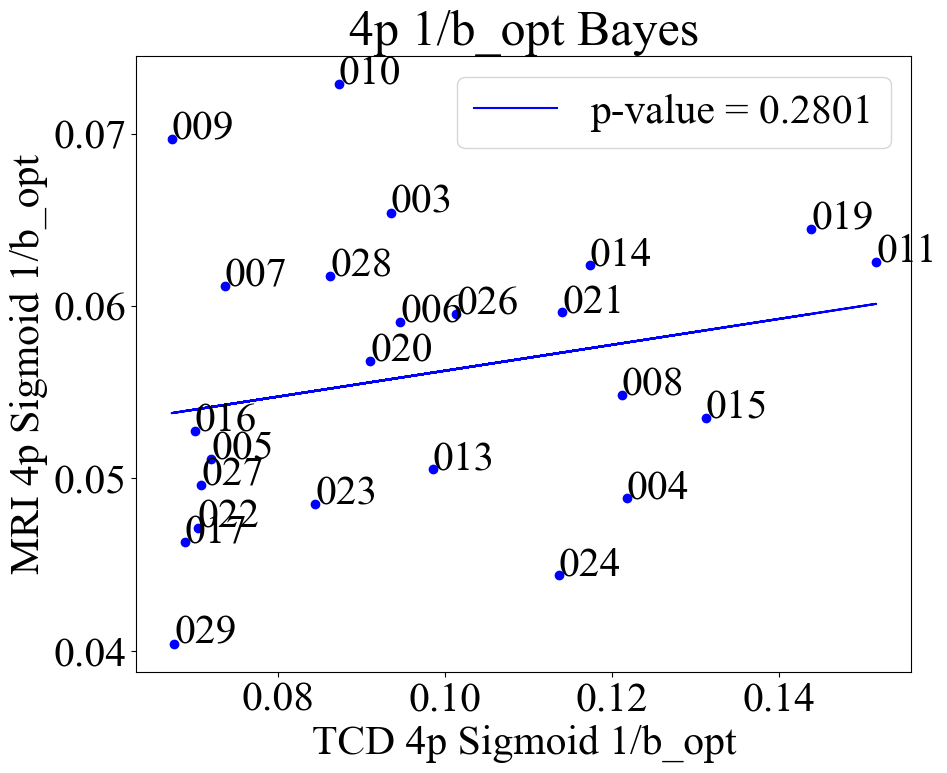

In [ ]:

# scatter plot the 4p bayes 1/b_opt parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(1/b_opt_4p_tcd_bayes, 1/b_opt_4p_mri_bayes, color='blue')
plt.xlabel('TCD 4p Sigmoid 1/b_opt')
plt.ylabel('MRI 4p Sigmoid 1/b_opt')
plt.title('4p 1/b_opt Bayes')

# fit a line to the data and calulate the p-value using stats linregress
slope, intercept, r_value, p_value_b_4p_bayes, std_err = stats.linregress(1/b_opt_4p_tcd_bayes, 1/b_opt_4p_mri_bayes)
plt.plot(1/b_opt_4p_tcd_bayes, slope*1/b_opt_4p_tcd_bayes + intercept, color='blue', label='p-value = %.4f' % p_value_b_4p_bayes)
plt.legend()

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    print(i)
    print(txt)
    print(1/b_opt_4p_tcd_bayes[i])
    print(1/b_opt_4p_mri_bayes[i])
    plt.annotate(txt, (1/b_opt_4p_tcd_bayes[i], 1/b_opt_4p_mri_bayes[i]))

plt.show()

0
26
0.23403581071518
-8.379486438302115
1
27
0.4394657701118354
-8.318445335191806
2
32
0.4937307324188622
-8.039341029631634
3
28
0.4264457282289508
-7.9009516324629345
4
32
0.2356143179376996
-8.223150514366813
5
18
0.4124926824052509
-7.935099951707196
6
41
0.0431074726557966
-8.325437046844987
7
40
0.5029339207669592
-7.912430137143208
8
27
0.7378735154012029
-8.023803465240379
9
50
0.211952608855155
-7.88930922547488
10
29
0.3800441669002243
-7.925984632918189
11
31
0.5424156487445866
-8.210529338338548
12
43
0.1629023385404455
-7.9880851957197505
13
70
0.4170208743776817
-8.0777078059585
14
41
0.4367740069540828
-7.746336599484172
15
29
0.4242591506954888
-8.194234072289523
16
31
0.6018976977572132
-7.89057523091206
17
28
0.552595500863026
-7.998671476680053
18
25
0.4051942470605106
-8.10083506432188
19
32
0.1948693537743504
-7.866918170185174
20
25
0.5085142426454197
-7.989487206475279
21
25
0.2325034622457376
-8.302914524850483
22
25
0.3549767144407018
-8.148827419457971
23
28

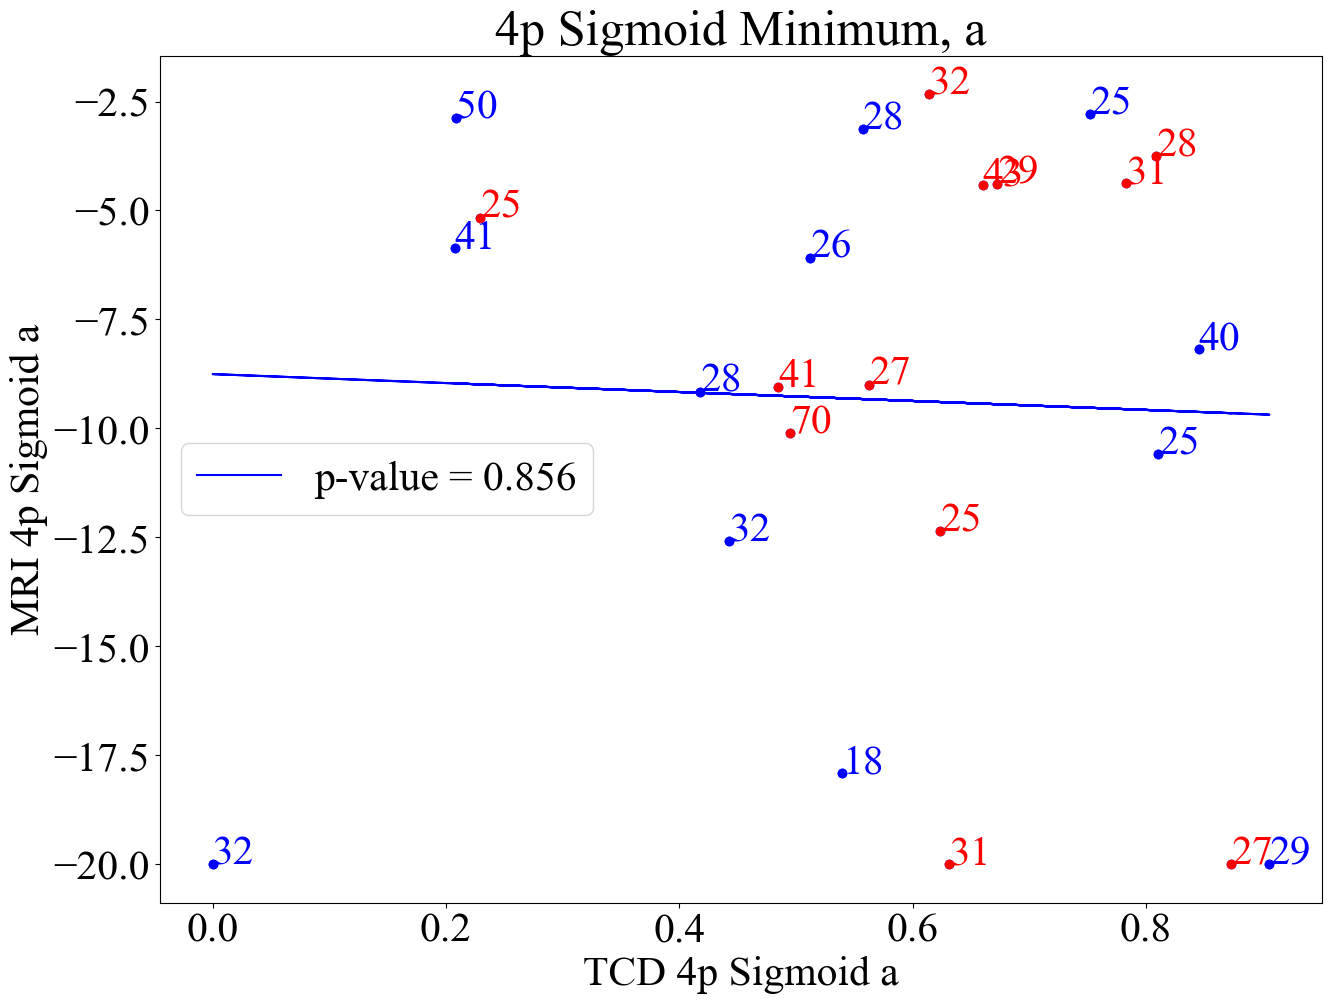

LSR 4p Sigmoid a_opt parameters for tcd and mri
p-value for 4p LSR:  0.8559578949361837
r-value for 4p LSR:  -0.039127701465489564


In [73]:
# scatter plot the 4p LSR a_opt parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(a_opt_4p_tcd_LSR, a_opt_4p_mri_LSR, color='blue')
plt.xlabel('TCD 4p Sigmoid a')
plt.ylabel('MRI 4p Sigmoid a')
plt.title('4p Sigmoid Minimum, a')

# fit a line to the data and calulate the p-value using stats linregress
slope, intercept, r_value, p_value_a_4p_LSR, std_err = stats.linregress(a_opt_4p_tcd_LSR, a_opt_4p_mri_LSR)
plt.plot(a_opt_4p_tcd_LSR, slope*a_opt_4p_tcd_LSR + intercept, color='blue', label='p-value = %.3f' % p_value_a_4p_LSR)
plt.legend()

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    print(i)
    print(txt)
    print(a_opt_4p_tcd_bayes[i])
    print(a_opt_4p_mri_bayes[i])
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(a_opt_4p_tcd_LSR[i], a_opt_4p_mri_LSR[i], color='red')
        plt.annotate(txt, (a_opt_4p_tcd_LSR[i], a_opt_4p_mri_LSR[i]), color='red')
    else:
        plt.scatter(a_opt_4p_tcd_LSR[i], a_opt_4p_mri_LSR[i], color='blue')
        plt.annotate(txt, (a_opt_4p_tcd_LSR[i], a_opt_4p_mri_LSR[i]), color='blue')
plt.show()

print('LSR 4p Sigmoid a_opt parameters for tcd and mri')
print('p-value for 4p LSR: ', p_value_a_4p_LSR)
print('r-value for 4p LSR: ', r_value)

0
26
0.09351991526641919
0.06542778843070025
1
27
0.12176486895618278
0.04886938269029603
2
32
0.07206152487540977
0.05112175060379203
3
28
0.09464159088740735
0.05906286372603935
4
32
0.07367451620100011
0.0611792032660026
5
18
0.12117821374266648
0.05481589218019203
6
41
0.06729479026543064
0.06969711934824371
7
40
0.08727725645578052
0.07290913053848844
8
27
0.15164488613400467
0.06258255038964201
9
50
0.098540598451049
0.05054405349956822
10
29
0.11732728627489168
0.062366684636984825
11
31
0.13121451238161502
0.053530277196869674
12
43
0.0700827845759707
0.05277303768663501
13
70
0.06887512386378662
0.0462971018495256
14
41
0.14389936214037077
0.06449991908336974
15
29
0.0910665153974068
0.05680686002990136
16
31
0.11408100298230338
0.05964190974823091
17
28
0.07041014381152806
0.047136385119912014
18
25
0.08446844284820805
0.04848719447854674
19
32
0.11364615832199355
0.04436988914552239
20
25
0.10134478279165215
0.05952880491049032
21
25
0.0708332773794477
0.049594581104620665
2

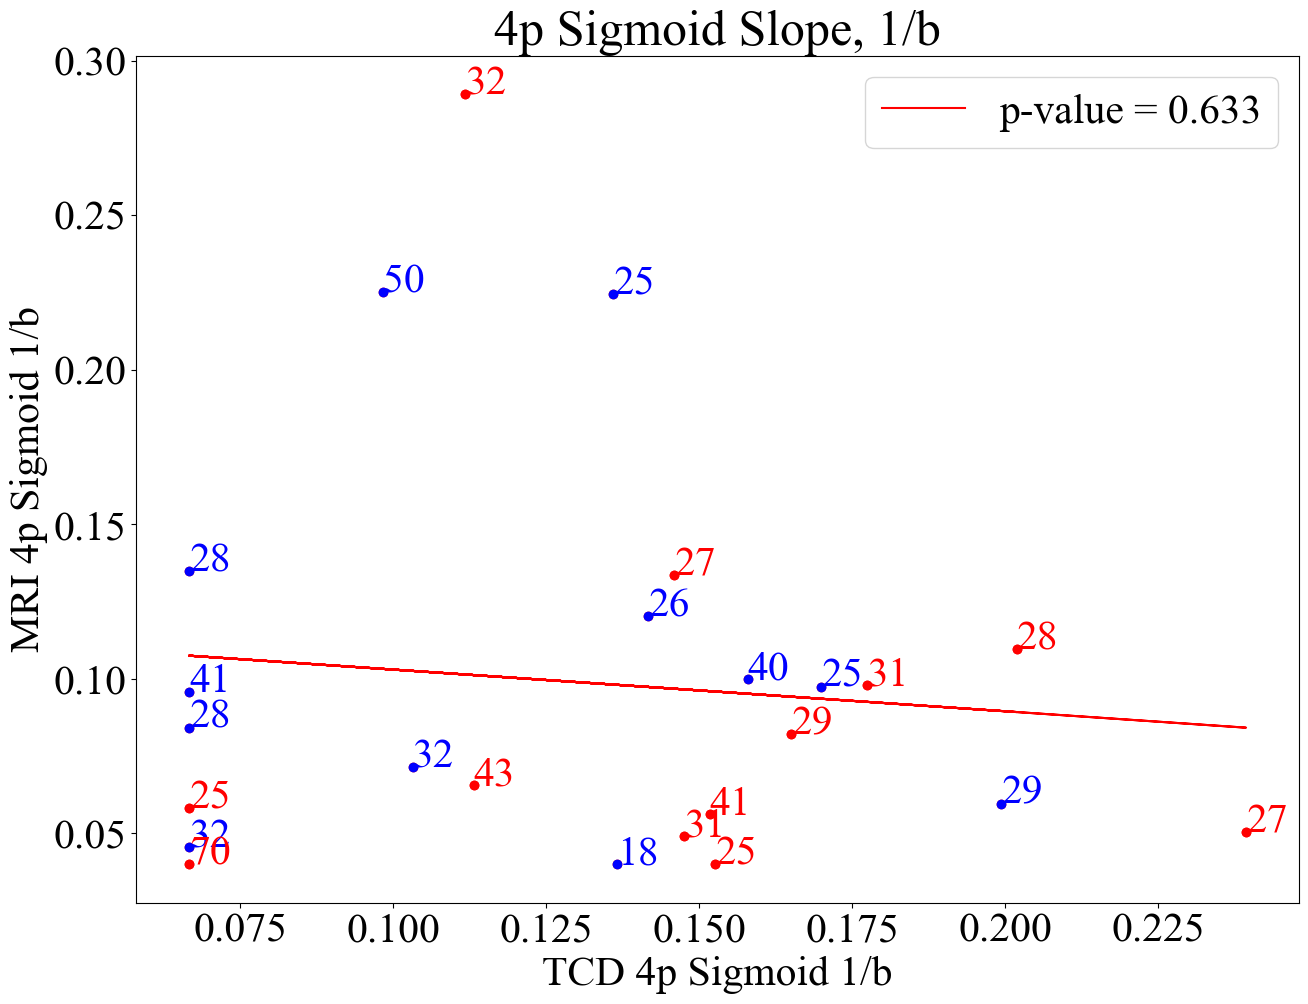

LSR 4p Sigmoid 1/b_opt parameters for tcd and mri
p-value for 4p LSR:  0.6329067895823828
r-value for 4p LSR:  -0.10272288227870213


In [74]:
# scatter plot the 4p LSR b_opt parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(1/b_opt_4p_tcd_LSR, 1/b_opt_4p_mri_LSR, color='red')
plt.xlabel('TCD 4p Sigmoid 1/b')
plt.ylabel('MRI 4p Sigmoid 1/b')
plt.title('4p Sigmoid Slope, 1/b')

# fit a line to the data and calulate the p-value using stats linregress
slope, intercept, r_value, p_value_b_4p_LSR, std_err = stats.linregress(1/b_opt_4p_tcd_LSR, 1/b_opt_4p_mri_LSR)
plt.plot(1/b_opt_4p_tcd_LSR, slope*1/b_opt_4p_tcd_LSR + intercept, color='red', label='p-value = %.3f' % p_value_b_4p_LSR)
plt.legend()

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    print(i)
    print(txt)
    print(1/b_opt_4p_tcd_bayes[i])
    print(1/b_opt_4p_mri_bayes[i])
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(1/b_opt_4p_tcd_LSR[i], 1/b_opt_4p_mri_LSR[i], color='red')
        plt.annotate(txt, (1/b_opt_4p_tcd_LSR[i], 1/b_opt_4p_mri_LSR[i]), color='red')
    else:
        plt.scatter(1/b_opt_4p_tcd_LSR[i], 1/b_opt_4p_mri_LSR[i], color='blue')
        plt.annotate(txt, (1/b_opt_4p_tcd_LSR[i], 1/b_opt_4p_mri_LSR[i]), color='blue')
plt.show()

print('LSR 4p Sigmoid 1/b_opt parameters for tcd and mri')
print('p-value for 4p LSR: ', p_value_b_4p_LSR)
print('r-value for 4p LSR: ', r_value)


In [61]:
# # scatter plot the 4p bayes c_opt parameter for the TCD vs MRI
# plt.figure(figsize=(8,6))
# plt.scatter(c_opt_4p_tcd_bayes, c_opt_4p_mri_bayes, color='blue')
# plt.xlabel('TCD 4p c_opt')
# plt.ylabel('MRI 4p c_opt')
# plt.title('4p c_opt Bayes')

# # fit a line to the data and calculate the p-value using stats linregress
# slope, intercept, r_value, p_value_c_4p_bayes, std_err = stats.linregress(c_opt_4p_tcd_bayes, c_opt_4p_mri_bayes)

# plt.plot(c_opt_4p_tcd_bayes, slope*c_opt_4p_tcd_bayes + intercept, color='blue', label='p-value = %.4f' % p_value_c_4p_bayes)
# plt.legend()
# plt.show()


0
26
10.692909602742942
15.284025702002433
1
27
8.212549387786481
20.46270987987269
2
32
13.877030797349104
19.561145465269405
3
28
10.566179103959422
16.931112663931412
4
32
13.57321434282354
16.34542371616176
5
18
8.252308472904177
18.242884685937018
6
41
14.859991331508768
14.347795279794427
7
40
11.457738712337449
13.71570326808525
8
27
6.594353594728712
15.97889497589905
9
50
10.148101551227738
19.78472106532854
10
29
8.52316653482509
16.034201686696328
11
31
7.621108228422711
18.681016657587524
12
43
14.26883943111573
18.949070279751098
13
70
14.519030150532814
21.5996241676248
14
41
6.9493011304978625
15.503895418960823
15
29
10.98098456535953
17.603507736101434
16
31
8.765701333771787
16.76673339638763
17
28
14.202499041569528
21.21503372513744
18
25
11.838740792191771
20.62400208455971
19
32
8.799241564916791
22.53780704117255
20
25
9.867306164697515
16.798590220375438
21
25
14.117658210887054
20.163493222989057
22
25
11.59302448970181
16.200835628271975
23
28
14.7949394870951

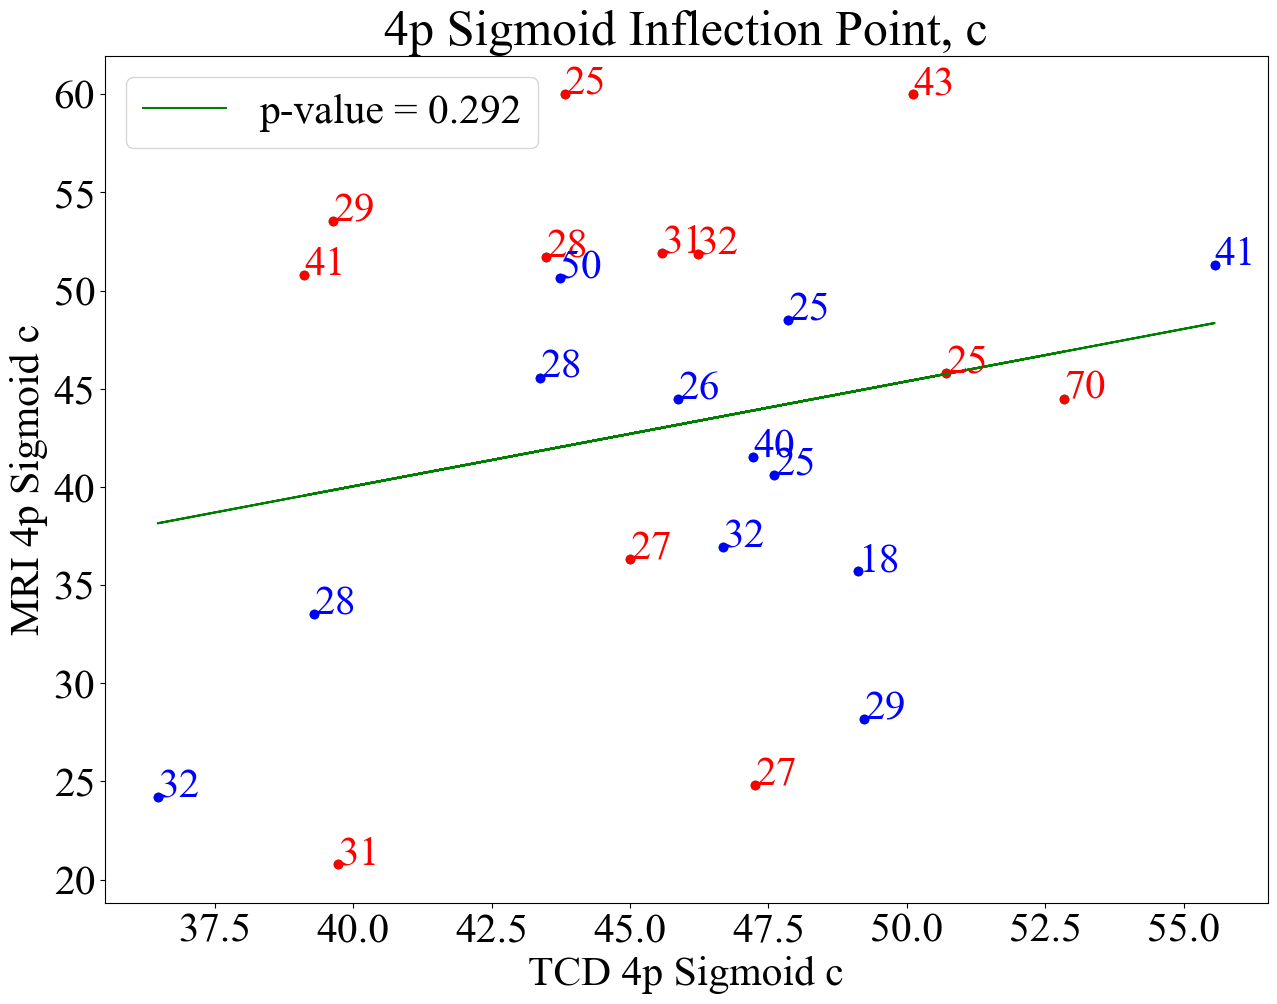

LSR 4p c_opt parameters for tcd and mri
p-value for 4p LSR:  0.29197247212337163
r-value for 4p LSR:  0.22432551145326757


In [75]:
# scatter plot the 4p LSR c_opt parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(c_opt_4p_tcd_LSR, c_opt_4p_mri_LSR, color='green')
plt.xlabel('TCD 4p Sigmoid c')
plt.ylabel('MRI 4p Sigmoid c')
plt.title('4p Sigmoid Inflection Point, c')

# fit a line to the data and calculate the p-value using stats linregress
slope, intercept, r_value, p_value_c_4p_LSR, std_err = stats.linregress(c_opt_4p_tcd_LSR, c_opt_4p_mri_LSR)

plt.plot(c_opt_4p_tcd_LSR, slope*c_opt_4p_tcd_LSR + intercept, color='green', label='p-value = %.3f' % p_value_c_4p_LSR)
plt.legend()

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    print(i)
    print(txt)
    print(b_opt_4p_tcd_bayes[i])
    print(b_opt_4p_mri_bayes[i])
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(c_opt_4p_tcd_LSR[i], c_opt_4p_mri_LSR[i], color='red')
        plt.annotate(txt, (c_opt_4p_tcd_LSR[i], c_opt_4p_mri_LSR[i]), color='red')
    else:
        plt.scatter(c_opt_4p_tcd_LSR[i], c_opt_4p_mri_LSR[i], color='blue')
        plt.annotate(txt, (c_opt_4p_tcd_LSR[i], c_opt_4p_mri_LSR[i]), color='blue')
plt.show()

print('LSR 4p c_opt parameters for tcd and mri')
print('p-value for 4p LSR: ', p_value_c_4p_LSR)
print('r-value for 4p LSR: ', r_value)

0
26
10.692909602742942
15.284025702002433
1
27
8.212549387786481
20.46270987987269
2
32
13.877030797349104
19.561145465269405
3
28
10.566179103959422
16.931112663931412
4
32
13.57321434282354
16.34542371616176
5
18
8.252308472904177
18.242884685937018
6
41
14.859991331508768
14.347795279794427
7
40
11.457738712337449
13.71570326808525
8
27
6.594353594728712
15.97889497589905
9
50
10.148101551227738
19.78472106532854
10
29
8.52316653482509
16.034201686696328
11
31
7.621108228422711
18.681016657587524
12
43
14.26883943111573
18.949070279751098
13
70
14.519030150532814
21.5996241676248
14
41
6.9493011304978625
15.503895418960823
15
29
10.98098456535953
17.603507736101434
16
31
8.765701333771787
16.76673339638763
17
28
14.202499041569528
21.21503372513744
18
25
11.838740792191771
20.62400208455971
19
32
8.799241564916791
22.53780704117255
20
25
9.867306164697515
16.798590220375438
21
25
14.117658210887054
20.163493222989057
22
25
11.59302448970181
16.200835628271975
23
28
14.7949394870951

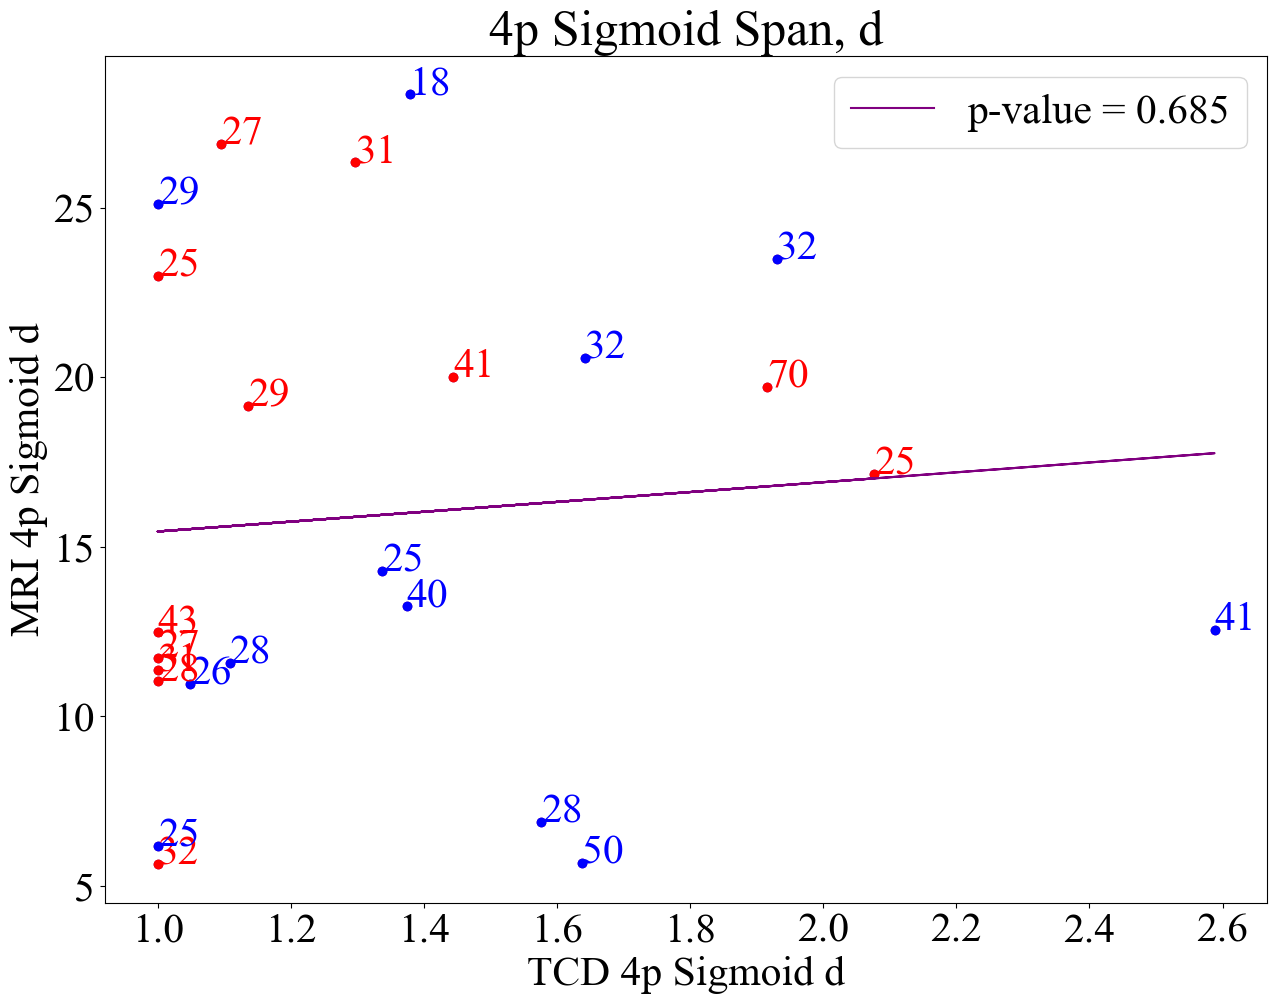

LSR 4p d_opt parameters for tcd and mri
p-value for 4p LSR:  0.6854620747894385
r-value for 4p LSR:  0.08717035711862002


In [76]:
# scatter plot the 4p LSR d_opt parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(d_opt_4p_tcd_LSR, d_opt_4p_mri_LSR, color='purple')
plt.xlabel('TCD 4p Sigmoid d')
plt.ylabel('MRI 4p Sigmoid d')
plt.title('4p Sigmoid Span, d')

# fit a line to the data and calculate the p-value using stats linregress
slope, intercept, r_value, p_value_d_4p_LSR, std_err = stats.linregress(d_opt_4p_tcd_LSR, d_opt_4p_mri_LSR)
plt.plot(d_opt_4p_tcd_LSR, slope*d_opt_4p_tcd_LSR + intercept, color='purple', label='p-value = %.3f' % p_value_d_4p_LSR)
plt.legend()

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    print(i)
    print(txt)
    print(b_opt_4p_tcd_bayes[i])
    print(b_opt_4p_mri_bayes[i])
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(d_opt_4p_tcd_LSR[i], d_opt_4p_mri_LSR[i], color='red')
        plt.annotate(txt, (d_opt_4p_tcd_LSR[i], d_opt_4p_mri_LSR[i]), color='red')
    else:
        plt.scatter(d_opt_4p_tcd_LSR[i], d_opt_4p_mri_LSR[i], color='blue')
        plt.annotate(txt, (d_opt_4p_tcd_LSR[i], d_opt_4p_mri_LSR[i]), color='blue')
plt.show()

print('LSR 4p d_opt parameters for tcd and mri')
print('p-value for 4p LSR: ', p_value_d_4p_LSR)
print('r-value for 4p LSR: ', r_value)


In [64]:
# # scatter plot the shift parameter for the TCD vs MRI
# plt.figure(figsize=(8,6))
# plt.scatter(shift_par_4p_tcd_bayes, shift_par_4p_mri_bayes, color='blue')
# plt.xlabel('TCD shift parameter')
# plt.ylabel('MRI shift parameter')
# plt.title('shift parameter Bayes')

# # fit a line to the data and calculate the p-value using stats linregress
# slope, intercept, r_value, p_value_shift_bayes, std_err = stats.linregress(shift_par_4p_tcd_bayes, shift_par_4p_mri_bayes)
# plt.plot(shift_par_4p_tcd_bayes, slope*shift_par_4p_tcd_bayes + intercept, color='blue', label='p-value = %.4f' % p_value_shift_bayes)
# plt.legend()
# plt.show()


In [65]:
# plot the cropped slope LR parameters from the cropped_slopes_LR.csv file
# read the cropped slopes csv file
csv_cropped_slopes = local + 'cropped_slopes_LR.csv'
df_cropped_slopes = pd.read_csv(csv_cropped_slopes)

# crop the dataframes to only include the subjects of interest
df_cropped_slopes = df_cropped_slopes[df_cropped_slopes['mr-sub'].str.contains('|'.join(subs_to_include))]
df_cropped_slopes = df_cropped_slopes.reset_index(drop=True)

# isolate the slope_lin column in df_cropped_slopes
slope_lin_cropped_tcd = df_cropped_slopes['slope_cropped_tcd']
slope_lin_cropped_mri = df_cropped_slopes['slope_cropped']




p-value for slope_lin_cropped:  0.0011855290855339864
r-value for slope_lin_cropped:  0.6215917969097794


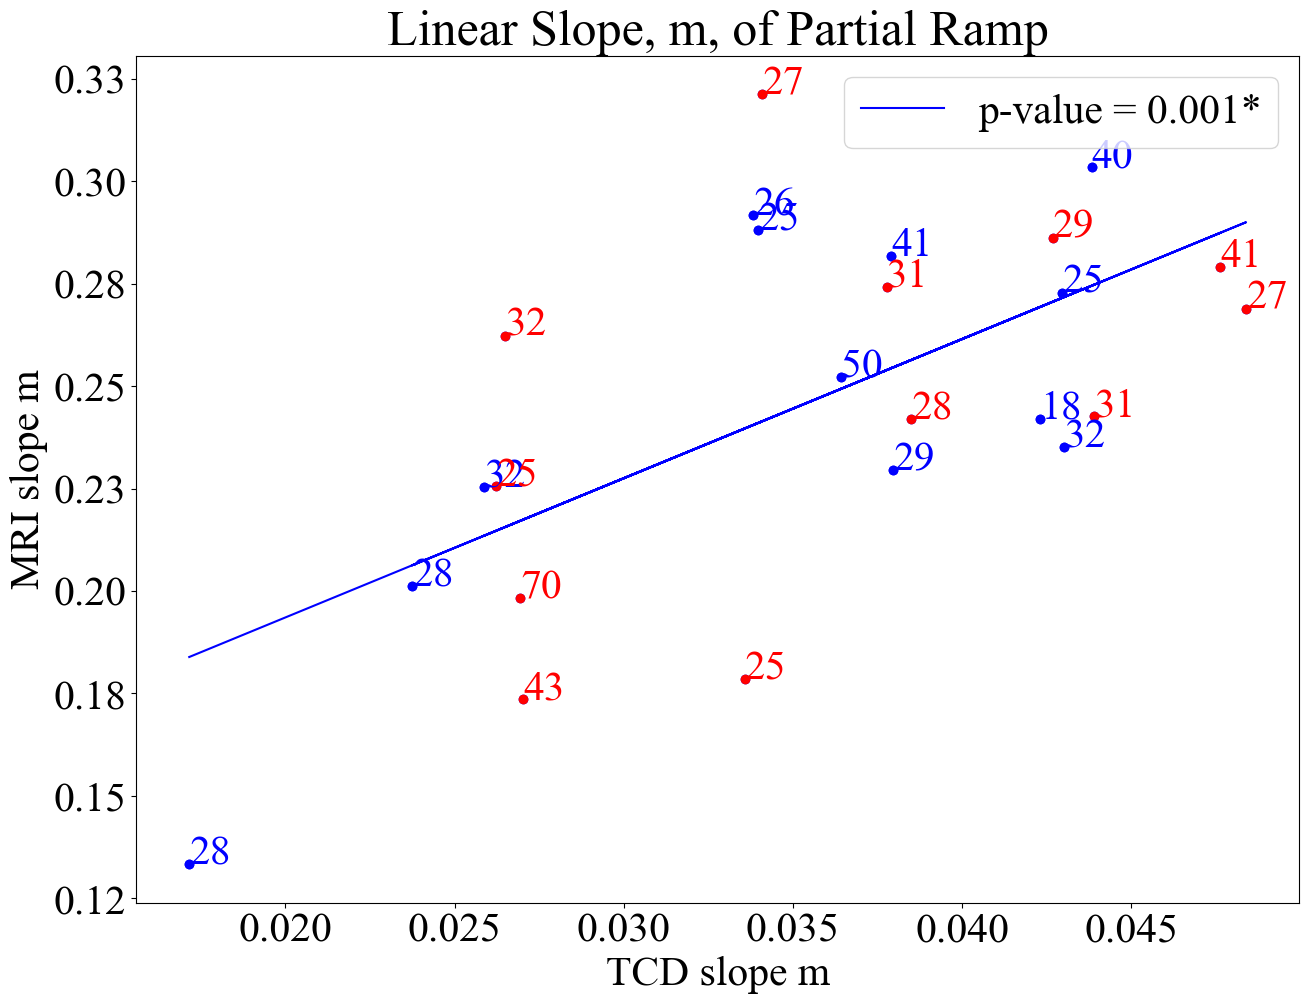

In [78]:
# scatter plot the cropped slope_lin parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(slope_lin_cropped_tcd, slope_lin_cropped_mri, color='blue')
plt.xlabel('TCD slope m')
plt.ylabel('MRI slope m')
plt.title('Linear Slope, m, of Partial Ramp')

# fit a line to the data and calulate the p-value
slope, intercept, r_value, p_value_slope_lin_cropped, std_err = stats.linregress(slope_lin_cropped_tcd, slope_lin_cropped_mri)
#plt.plot(slope_lin_cropped_tcd, slope* slope_lin_cropped_tcd + intercept, color='blue', label='p-value = %.4f, r-value = %.4f' % (p_value_slope_lin_cropped, r_value))
plt.plot(slope_lin_cropped_tcd, slope* slope_lin_cropped_tcd + intercept, color='blue', label='p-value = %.3f*' % (p_value_slope_lin_cropped))
plt.legend()

# include up to 2 decimal places on the y-axis
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

print('p-value for slope_lin_cropped: ', p_value_slope_lin_cropped)
print('r-value for slope_lin_cropped: ', r_value)
# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
        # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(slope_lin_cropped_tcd[i], slope_lin_cropped_mri[i], color='red')
        plt.annotate(txt, (slope_lin_cropped_tcd[i], slope_lin_cropped_mri[i]), color='red')
    else:
        plt.scatter(slope_lin_cropped_tcd[i], slope_lin_cropped_mri[i], color='blue')
        plt.annotate(txt, (slope_lin_cropped_tcd[i], slope_lin_cropped_mri[i]), color='blue')

plt.show()

In [67]:
# plot the b parameter from the 2p_fits_LSR.csv file
# read the cropped slopes csv file
csv_2p_fits_LSR = local + '2p_fits_LSR.csv'
df_2p_fits_LSR = pd.read_csv(csv_2p_fits_LSR)
# crop the dataframes to only include the subjects of interest
df_2p_fits_LSR = df_2p_fits_LSR[df_2p_fits_LSR['mr-sub'].str.contains('|'.join(subs_to_include))]
df_2p_fits_LSR = df_2p_fits_LSR.reset_index(drop=True)

# isolate the b column in df_2p_fits_LSR
b_2p_fit_tcd = df_2p_fits_LSR['b_2p_opt_tcd']
b_2p_fit_mri = df_2p_fits_LSR['b_2p_opt_mri']

c_2p_fit_tcd = df_2p_fits_LSR['c_2p_opt_tcd']
c_2p_fit_mri = df_2p_fits_LSR['c_2p_opt_mri']

shift_par_2p_tcd = df_2p_fits_LSR['shift_par_2p_tcd']
shift_par_2p_mri = df_2p_fits_LSR['shift_par_2p_mri']

p-value for 2p_fit:  0.004718313403517246
r-value for 2p_fit:  0.5567366778477714


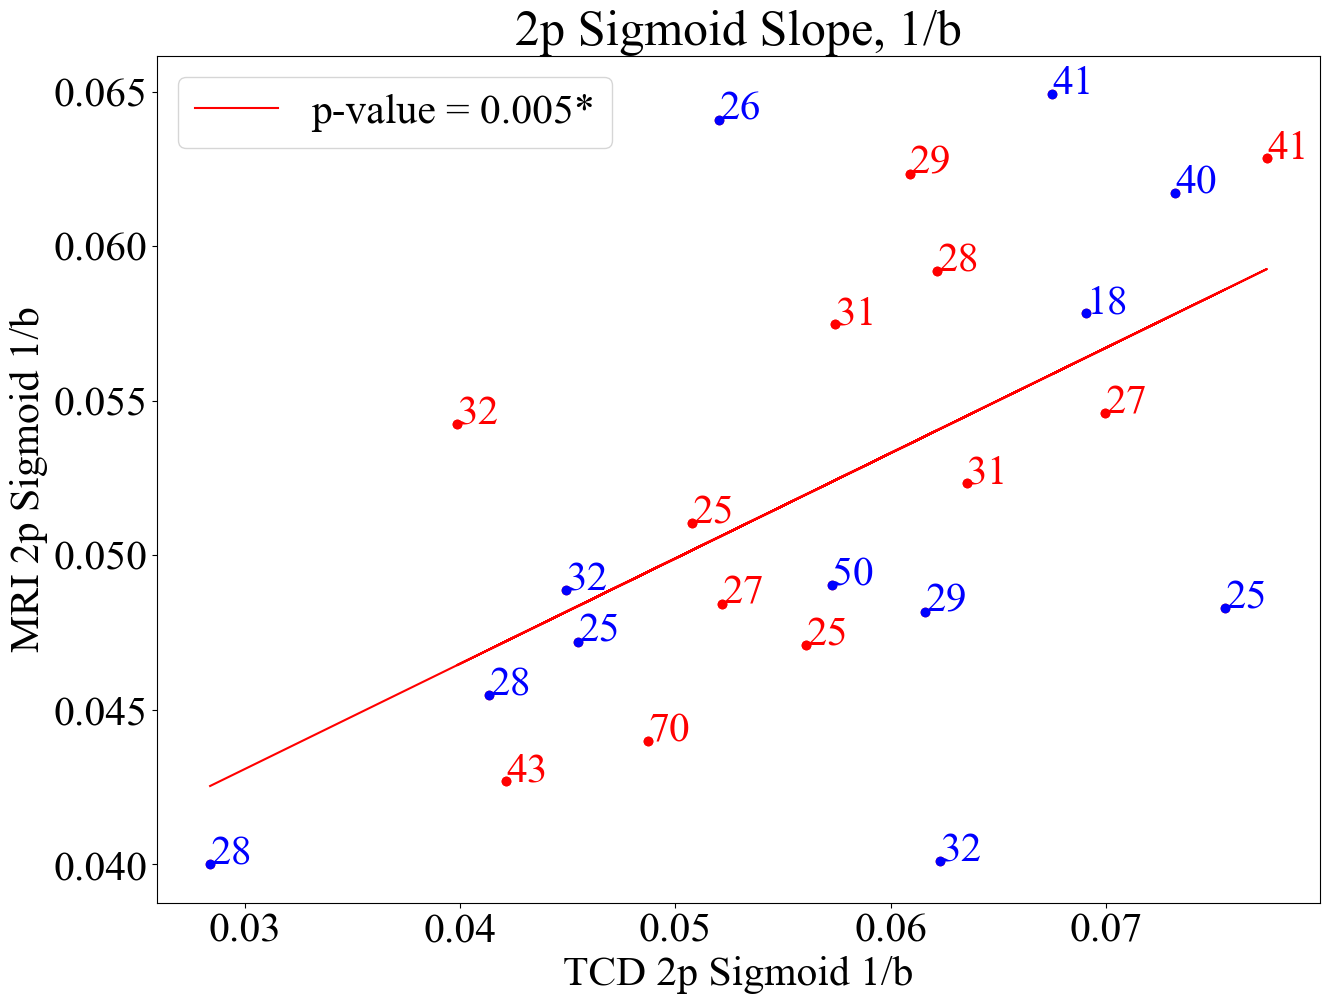

In [79]:
# scatter plot the 2p fit b parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(1/b_2p_fit_tcd, 1/b_2p_fit_mri, color='red')
plt.xlabel('TCD 2p Sigmoid 1/b')
plt.ylabel('MRI 2p Sigmoid 1/b')
plt.title('2p Sigmoid Slope, 1/b')

# fit a line to the data and calulate the p-value
slope, intercept, r_value, p_value_2p_fit, std_err = stats.linregress(1/b_2p_fit_tcd, 1/b_2p_fit_mri)
plt.plot((1/b_2p_fit_tcd), slope* (1/b_2p_fit_tcd) + intercept, color='red', label='p-value = %.3f*' % (p_value_2p_fit))
plt.legend()

print('p-value for 2p_fit: ', p_value_2p_fit)
print('r-value for 2p_fit: ', r_value)

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(1/b_2p_fit_tcd[i], 1/b_2p_fit_mri[i], color='red')
        plt.annotate(txt, (1/b_2p_fit_tcd[i], 1/b_2p_fit_mri[i]), color='red')
    else:
        plt.scatter(1/b_2p_fit_tcd[i], 1/b_2p_fit_mri[i], color='blue')
        plt.annotate(txt, (1/b_2p_fit_tcd[i], 1/b_2p_fit_mri[i]), color='blue')

plt.show()

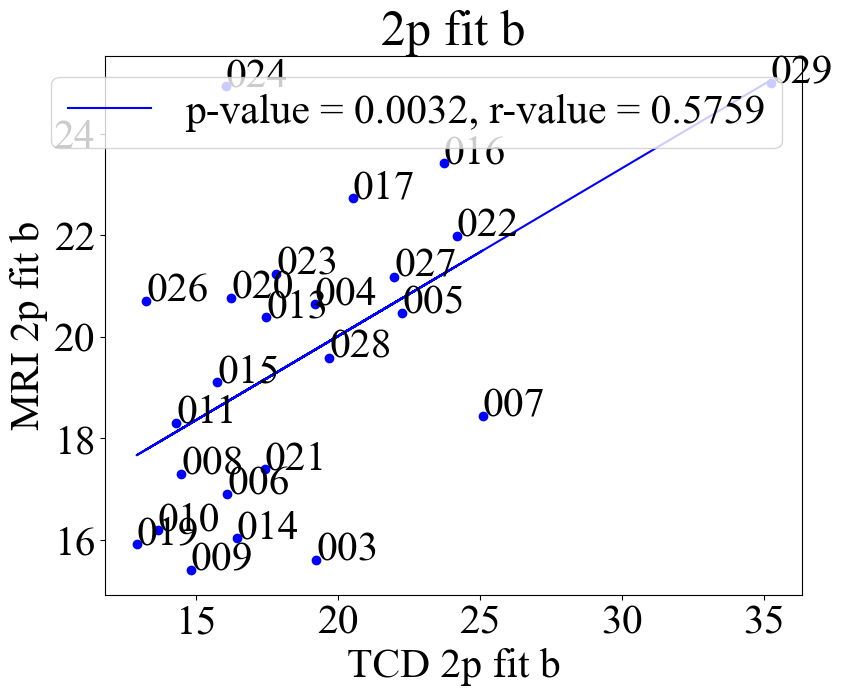

In [ ]:
# scatter plot the 2p fit b parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(b_2p_fit_tcd, b_2p_fit_mri, color='blue')
plt.xlabel('TCD 2p fit b')
plt.ylabel('MRI 2p fit b')
plt.title('2p fit b')

# fit a line to the data and calulate the p-value
slope, intercept, r_value, p_value_2p_fit, std_err = stats.linregress(b_2p_fit_tcd, b_2p_fit_mri)
plt.plot(b_2p_fit_tcd, slope* b_2p_fit_tcd + intercept, color='blue', label='p-value = %.4f, r-value = %.4f' % (p_value_2p_fit, r_value))
plt.legend()

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    plt.annotate(txt, (b_2p_fit_tcd[i], b_2p_fit_mri[i]))

plt.show()

p-value for 2p_fit:  0.016329336457882496
r-value for 2p_fit:  0.48488204388059714


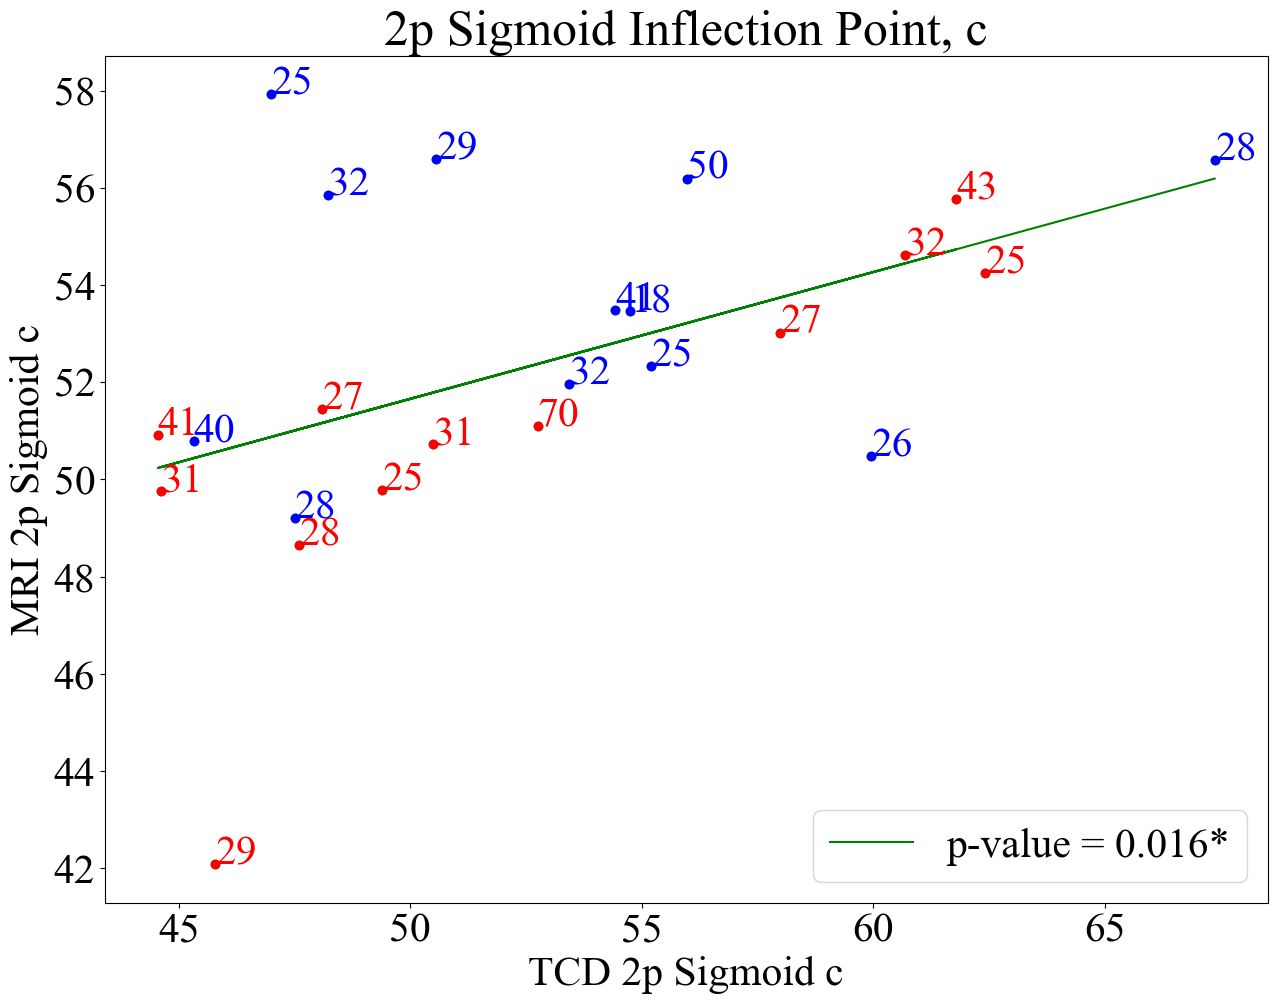

In [ ]:
# scatter plot the 2p fit c parameter for the TCD vs MRI

plt.figure(figsize=(15,11))
plt.scatter(c_2p_fit_tcd, c_2p_fit_mri, color='green')
plt.xlabel('TCD 2p Sigmoid c')
plt.ylabel('MRI 2p Sigmoid c')
plt.title('2p Sigmoid Inflection Point, c')

# fit a line to the data and calulate the p-value
slope, intercept, r_value, p_value_2p_fit, std_err = stats.linregress(c_2p_fit_tcd, c_2p_fit_mri)
#plt.plot(c_2p_fit_tcd, slope* c_2p_fit_tcd + intercept, color='red', label='p-value = %.4f, r-value = %.4f' % (p_value_2p_fit, r_value))
plt.plot(c_2p_fit_tcd, slope* c_2p_fit_tcd + intercept, color='green', label='p-value = %.3f*' % (p_value_2p_fit))
## put legend in bottom right corner
plt.legend(loc='lower right')

print('p-value for 2p_fit: ', p_value_2p_fit)
print('r-value for 2p_fit: ', r_value)

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(c_2p_fit_tcd[i], c_2p_fit_mri[i], color='red')
        plt.annotate(txt, (c_2p_fit_tcd[i], c_2p_fit_mri[i]), color='red')
    else:
        plt.scatter(c_2p_fit_tcd[i], c_2p_fit_mri[i], color='blue')
        plt.annotate(txt, (c_2p_fit_tcd[i], c_2p_fit_mri[i]), color='blue')

plt.show()

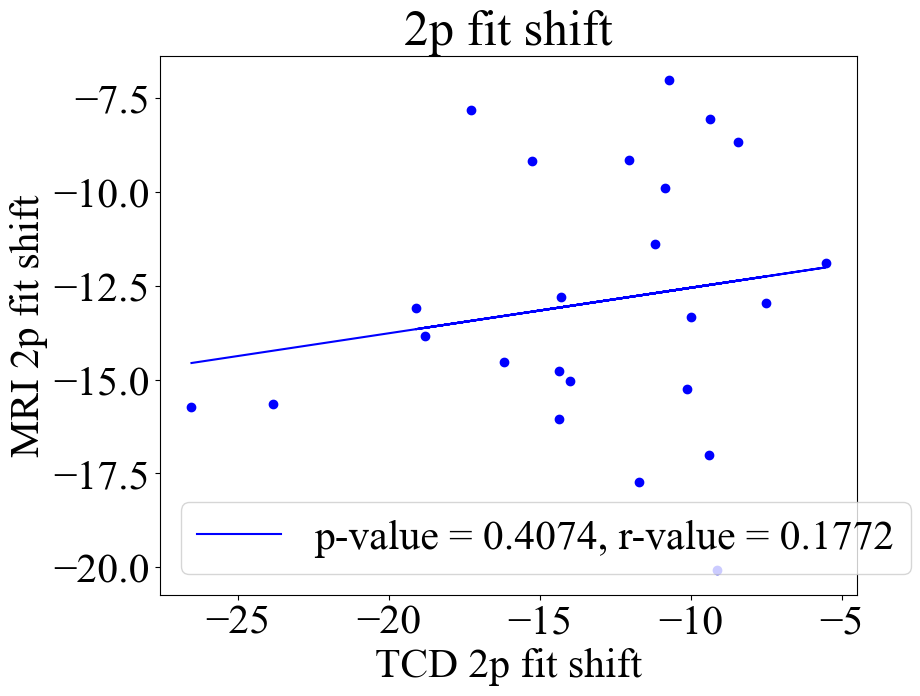

In [ ]:
# scatter plot the 2p fit shift parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(shift_par_2p_tcd, shift_par_2p_mri, color='blue')
plt.xlabel('TCD 2p fit shift')
plt.ylabel('MRI 2p fit shift')
plt.title('2p fit shift')

# fit a line to the data and calulate the p-value
slope, intercept, r_value, p_value_shift, std_err = stats.linregress(shift_par_2p_tcd, shift_par_2p_mri)
plt.plot(shift_par_2p_tcd, slope* shift_par_2p_tcd + intercept, color='blue', label='p-value = %.4f, r-value = %.4f' % (p_value_shift, r_value))
plt.legend()

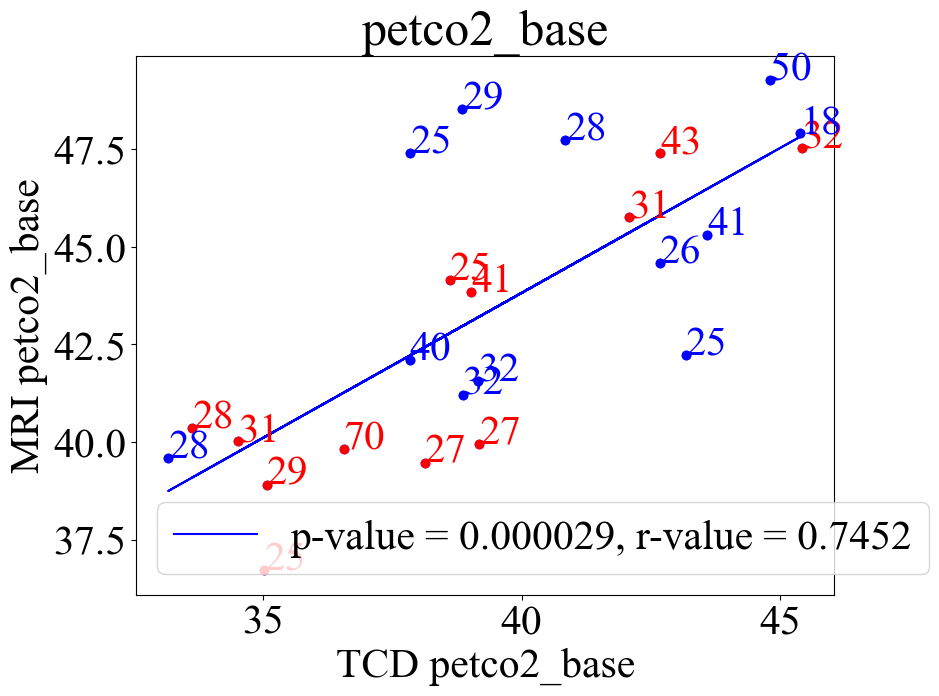

In [ ]:
# plot the petco2_base parameter from the mri_log.csv file (header mrpetco2_base) and tcd_log.csv file (header petco2_base)
# read the mri log csv file
csv_mri_log = local + 'mri_log.csv'
df_mri_log = pd.read_csv(csv_mri_log)
# read the tcd log csv file
csv_tcd_log = local + 'tcd_log.csv'
df_tcd_log = pd.read_csv(csv_tcd_log)

# crop the dataframes to only include the subjects of interest
df_mri_log = df_mri_log[df_mri_log['mr-sub'].str.contains('|'.join(subs_to_include))]
df_mri_log = df_mri_log.reset_index(drop=True)
df_tcd_log = df_tcd_log[df_tcd_log['mr-sub'].str.contains('|'.join(subs_to_include))]
df_tcd_log = df_tcd_log.reset_index(drop=True)

# isolate the petco2_base column in df_mri_log
petco2_base_mri = df_mri_log['mrpetco2_base']
# isolate the petco2_base column in df_tcd_log
petco2_base_tcd = df_tcd_log['petco2_base']

# scatter plot the petco2_base parameter for the TCD vs MRI
plt.figure(figsize=(15,11))
plt.scatter(petco2_base_tcd, petco2_base_mri, color='blue')
plt.xlabel('TCD petco2_base')
plt.ylabel('MRI petco2_base')
plt.title('petco2_base')

# fit a line to the data and calulate the p-value
slope, intercept, r_value, p_value_petco2_base, std_err = stats.linregress(petco2_base_tcd, petco2_base_mri)
plt.plot(petco2_base_tcd, slope* petco2_base_tcd + intercept, color='blue', label='p-value = %.6f, r-value = %.4f' % (p_value_petco2_base, r_value))

# label the points with the subject number
for i, txt in enumerate(subs_to_include):
    txt = age[i]
    # if the demo sex value is F, plot the point in red, otherwise plot in blue
    if sex[i] == 'F':
        plt.scatter(petco2_base_tcd[i], petco2_base_mri[i], color='red')
        plt.annotate(txt, (petco2_base_tcd[i], petco2_base_mri[i]), color='red')
    else:
        plt.scatter(petco2_base_tcd[i], petco2_base_mri[i], color='blue')
        plt.annotate(txt, (petco2_base_tcd[i], petco2_base_mri[i]), color='blue')

plt.legend()